### Problem Statement:
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

### Columns Description

1. Item_Identifier: Unique product ID
2. Item_Weight: Weight of product
3. Item_Fat_Content: Whether the product is low fat or not
4. Item_Visibility: The % of total display area of all products in a store allocated to theparticular product
5. Item_Type: The category to which the product belongs
6. Item_MRP: Maximum Retail Price (list price) of the product
7. Outlet_Identifier: Unique store ID
8. Outlet_Establishment_Year: The year in which store was established
9. Outlet_Size: The size of the store in terms of ground area covered
10. Outlet_Location_Type: The type of city in which the store is located
11. Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
12. Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## To see all columns of the dataset

pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv('Data_Set/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# !pip install --user pandas-profiling

In [5]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# profile.to_notebook_iframe()

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
## Ceaking for missing values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
## Cheak for duplicate data

df.duplicated().sum()

0

## Remark

1. Missing values in Item_Weight,Outlet_Size
2. No duplicates row

In [10]:
## Creating two list of attriutes

Categorical = [i for i in df.columns if df[i].dtypes == 'object']
Numerical = [i for i in df.columns if df[i].dtypes != 'object' and i not in Categorical]

## Summary of Categorial data

In [11]:
#Summary of Categorial data

Categorical_summary = pd.DataFrame(columns=['columns', 'values', 'inc_na', 'exc_na', 'mode', 'missval', '%_missval'])
temp = pd.DataFrame()

for i in Categorical:
    temp['columns'] = [i]
    temp['values'] = [df[i].unique()]
    temp['inc_na'] = len(df[i].unique())
    temp['exc_na'] = df[i].nunique()
    temp['mode'] = df[i].mode()[0]
    temp['missval'] = df[i].isnull().sum()
    temp['%_missval'] = (df[i].isnull().sum()/len(df))*100
    Categorical_summary = pd.concat([temp,Categorical_summary],ignore_index=True)
    
Categorical_summary

,columns,values,inc_na,exc_na,mode,missval,%_missval
0,Outlet_Type,"[Supermarket Type1, Supermarket Type2, Grocery...",4,4,Supermarket Type1,0,0.000000
1,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3,3,Tier 3,0,0.000000
2,Outlet_Size,"[Medium, nan, High, Small]",4,3,Medium,2410,28.276428
3,Outlet_Identifier,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10,10,OUT027,0,0.000000
4,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16,16,Fruits and Vegetables,0,0.000000
5,Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]",5,5,Low Fat,0,0.000000
6,Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559,1559,FDG33,0,0.000000


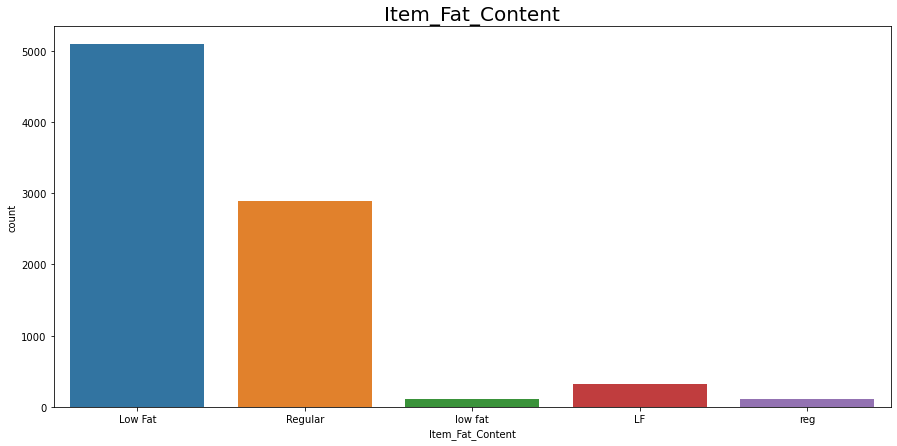

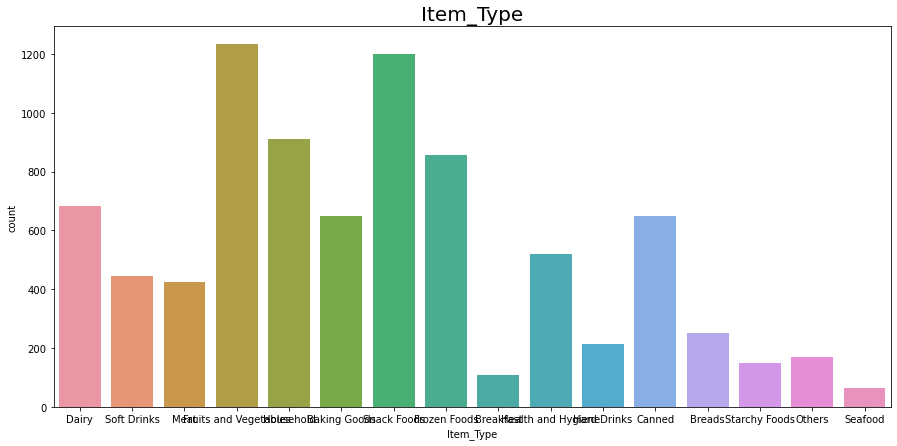

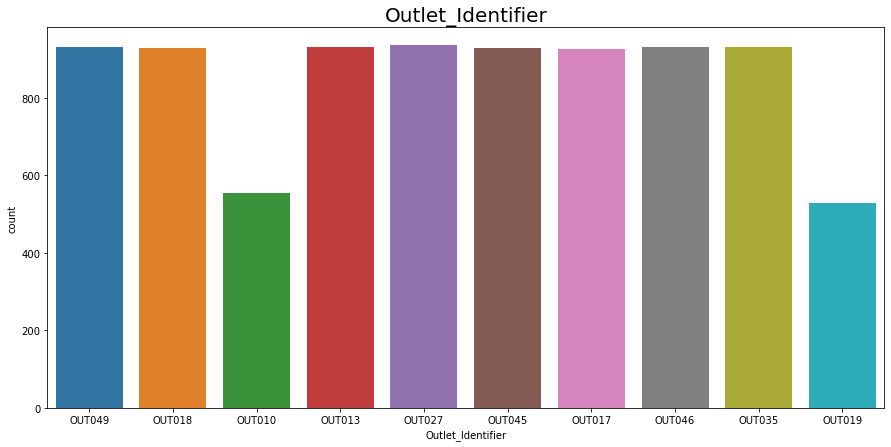

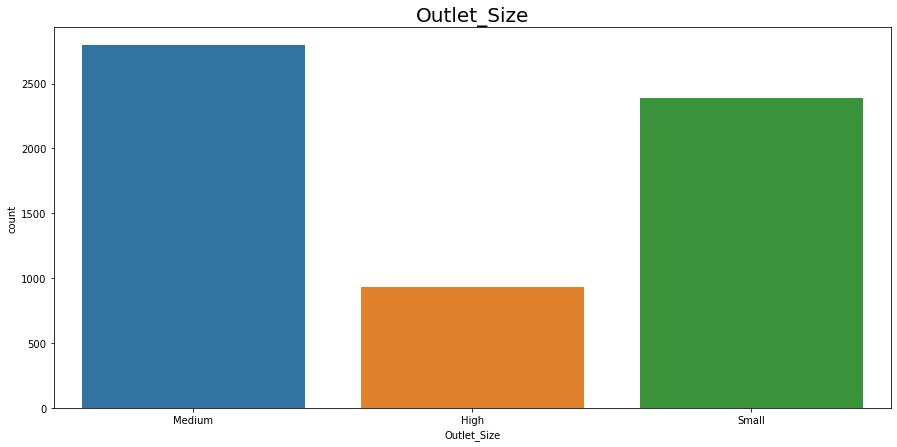

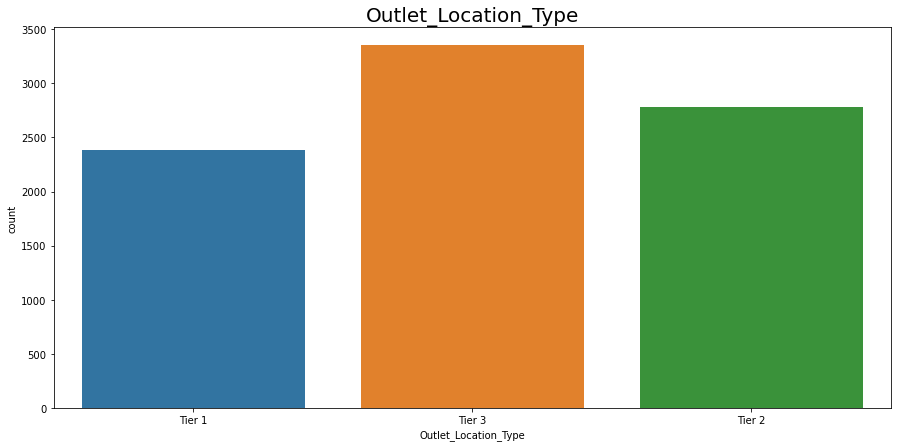

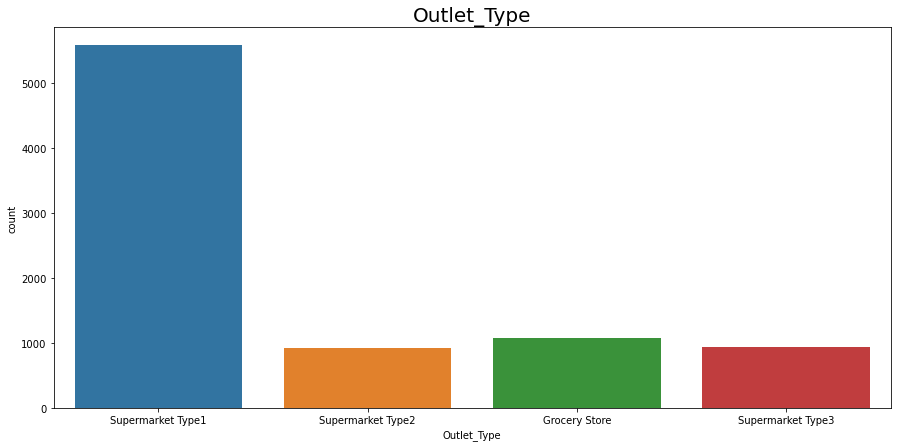

In [12]:
# Count plot of Categorical variable

for feature in Categorical:
    if feature != 'Item_Identifier':
        data = df.copy()
        plt.figure(figsize=(15,7))
        sns.countplot(x=data[feature])
        plt.title(feature, size=20)
        plt.show()

## Remark
1. In Item_Fat_Content the categories Low Fat, low fat, LF same
2. In Item_Fat_Content the categories Reegular and reg are same

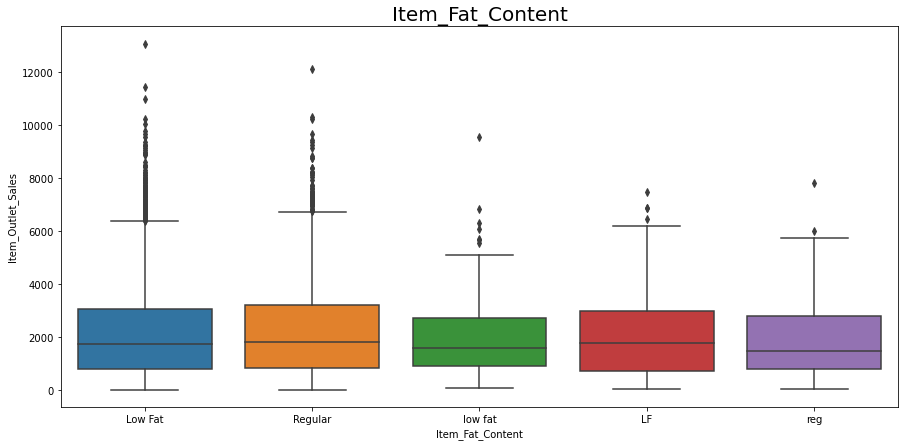

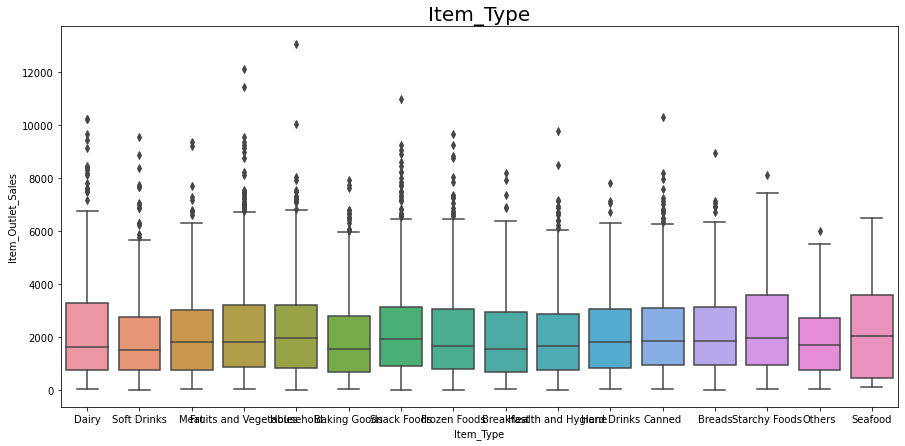

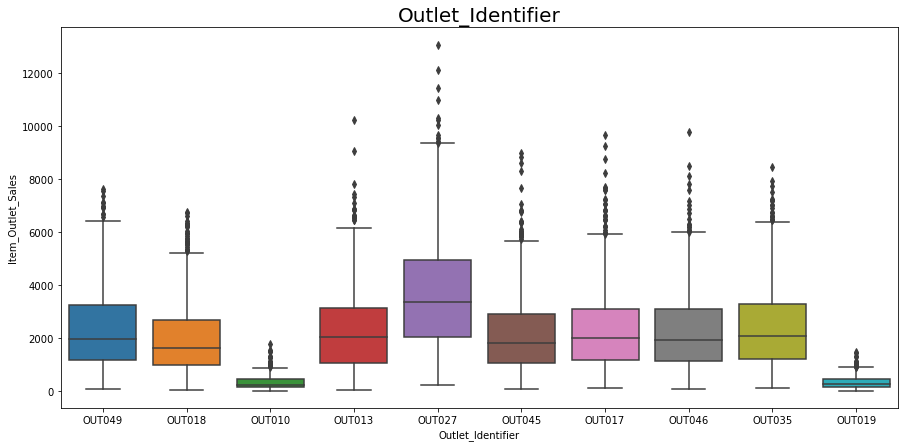

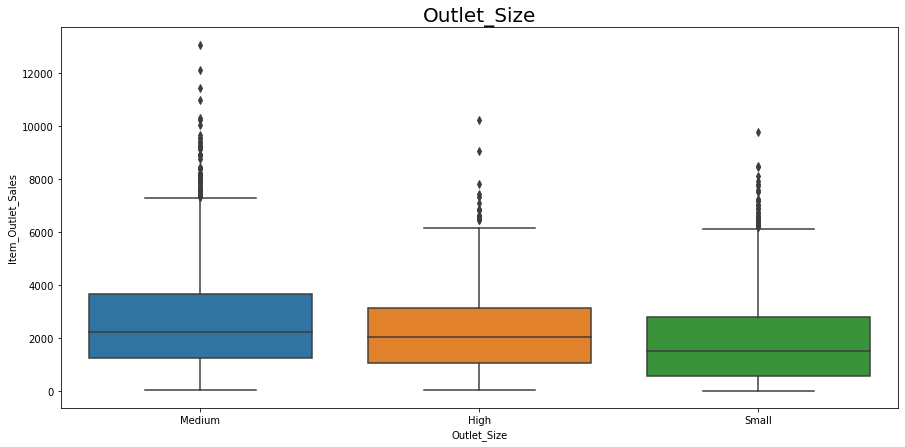

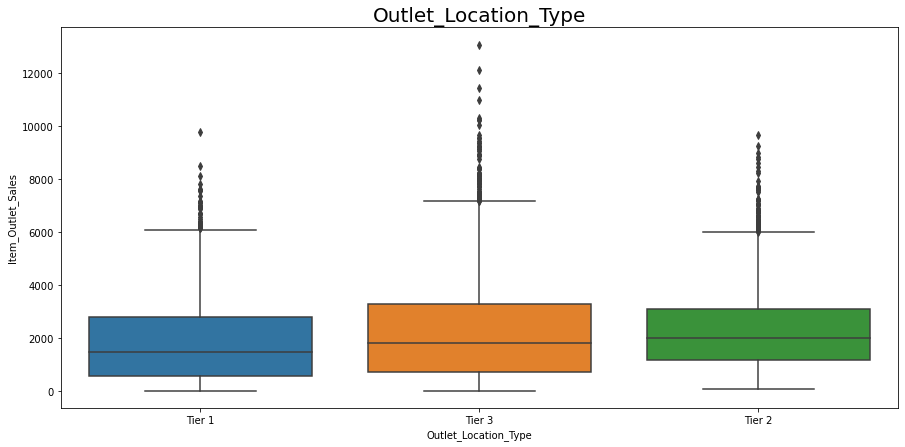

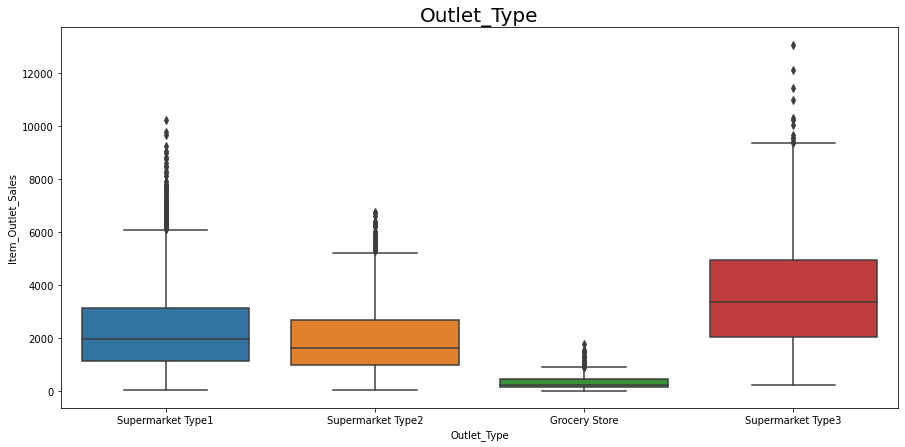

In [13]:
# Relationship Between Categorical Variable and Item_Outlet_Sales

for feature in Categorical:
    if feature != 'Item_Identifier':
        data = df.copy()
        plt.figure(figsize=(15,7))
        sns.boxplot(x=data[feature],y=data.Item_Outlet_Sales)
        plt.title(feature, size=20)
        plt.show()

## Summary of Nuerical data

In [14]:
#Summary of Nuerical data
from scipy.stats import skew, kurtosis

Numerical_summary = pd.DataFrame(columns=['columns','Min','1st_Quartile','Median','3rd_Quartile','Max','Mean','Variance',
                                          'Skewness','Kurtosis','MissingVals','%_MissingVals','IQR','lower','upper',
                                          'Outlier_upper','Outlier_lower'])
temp = pd.DataFrame()
for i in Numerical:
    temp['columns'] = [i]
    temp['Min'] = df[i].min()
    temp['1st_Quartile'] = df[i].quantile(0.25)
    temp['Median'] = df[i].quantile(0.5)
    temp['3rd_Quartile'] = df[i].quantile(0.75)
    temp['Max'] = df[i].max()
    temp['Mean'] = df[i].mean()
    temp['Variance'] = df[i].var()
    temp['Skewness'] = skew(df[i], axis=0, bias=True)
    temp['Kurtosis'] = kurtosis(df[i], axis=0, fisher=True, bias=True)
    temp['MissingVals'] = df[i].isnull().sum()
    temp['%_MissingVals'] = df[i].isnull().sum()/len(df)*100
    temp['IQR'] = df[i].quantile(0.75) - df[i].quantile(0.25)
    temp['lower'] = df[i].quantile(0.25) - 1.5*temp['IQR']
    temp['upper'] = df[i].quantile(0.75) + 1.5*temp['IQR']
    temp['Outlier_lower'] = len(df.loc[df[i]<float(temp['lower'])])
    temp['Outlier_upper'] = len(df.loc[df[i]>float(temp['upper'])])
    Numerical_summary = pd.concat([temp,Numerical_summary],ignore_index=True)
    
Numerical_summary

,columns,Min,1st_Quartile,Median,3rd_Quartile,Max,Mean,Variance,Skewness,Kurtosis,MissingVals,%_MissingVals,IQR,lower,upper,Outlier_lower,Outlier_upper
0,Item_Outlet_Sales,33.290,834.247400,1794.331000,3101.296400,13086.964800,2181.288914,2.912141e+06,1.177323,1.614225,0,0.000000,2267.049000,-2566.326100,6501.869900,0,186
1,Outlet_Establishment_Year,1985.000,1987.000000,1999.000000,2004.000000,2009.000000,1997.831867,7.008637e+01,-0.396571,-1.205691,0,0.000000,17.000000,1961.500000,2029.500000,0,0
2,Item_MRP,31.290,93.826500,143.012800,185.643700,266.888400,140.992782,3.878184e+03,0.127180,-0.889951,0,0.000000,91.817200,-43.899300,323.369500,0,0
3,Item_Visibility,0.000,0.026989,0.053931,0.094585,0.328391,0.066132,2.662335e-03,1.166885,1.677757,0,0.000000,0.067596,-0.074404,0.195979,0,144
4,Item_Weight,4.555,8.773750,12.600000,16.850000,21.350000,12.857645,2.156169e+01,NaN,NaN,1463,17.165317,8.076250,-3.340625,28.964375,0,0


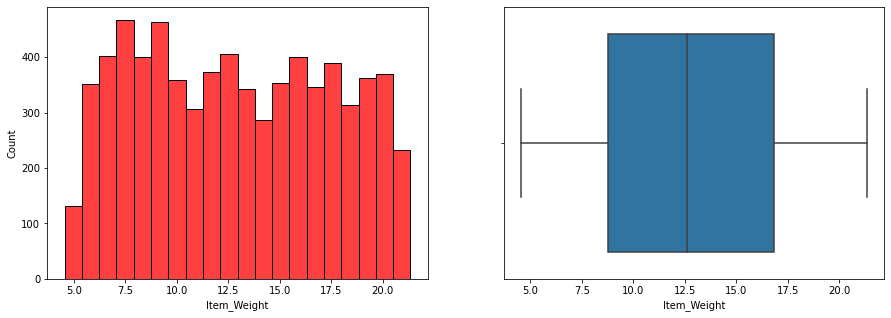

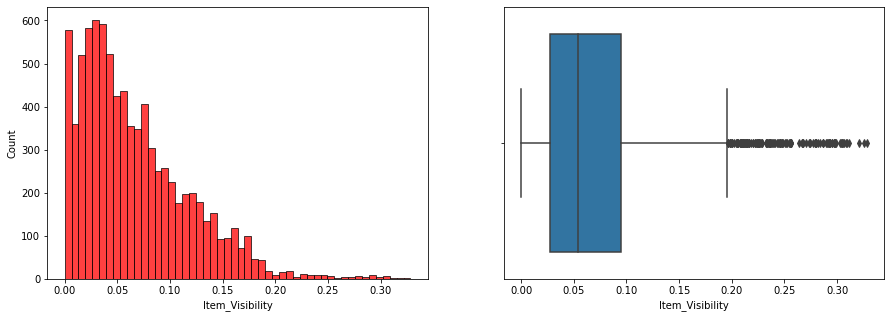

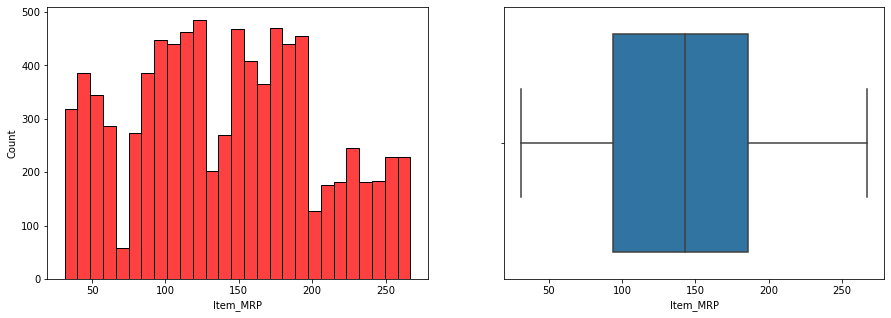

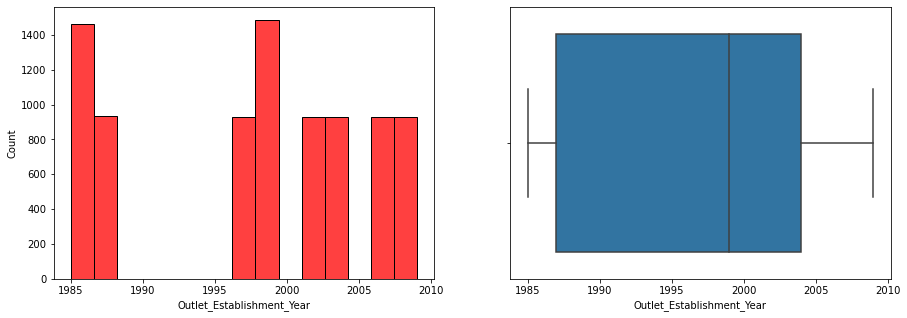

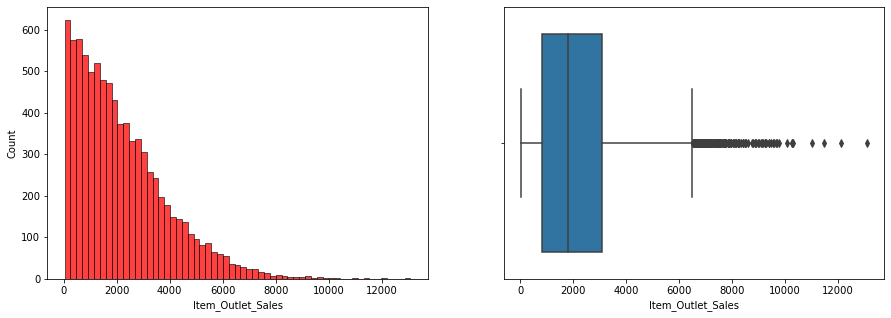

In [15]:
## plot Histogram and Boxplot to see the distribution and outliers

for feature in Numerical:
    fig = plt.figure(figsize = (15,5))
    ax1 = fig.add_subplot(1,2,1)
    sns.histplot(x=feature, data=df, color='red',ax = ax1)
    ax2 = fig.add_subplot(1,2,2)
    sns.boxplot(x=feature, data=df, ax = ax2)

## Remark
1. **Item_Visibility** and **Item_Outlet_Sales** have outliers and positivly skew.

In [16]:
## Correlation Matrix

df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [17]:
df1 = df.copy()

<AxesSubplot:>

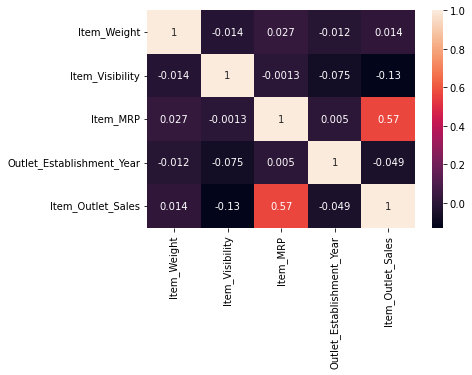

In [18]:
sns.heatmap(df.corr(), annot=True)

## Report
1. Correlation between **Item_Weight** and **Item_Outlet_Sales** is very **low**
2. Correlation between **Item_Visibility** and **Item_Outlet_Sales** is very **low**
3. Correlation between **Outlet_Establishment_Year** and **Item_Outlet_Sales** is very **low**

# Feature Engineering

## 1. Missing Value Imputation

Here wee have one categorical(Outlet_Size) and one numerical(Item_Weight) attribute with missing values.

In [19]:
## Creating a function which impute missing values of a numerical variable with it's median and with it's rando number

def Missing_Value_Imputation_with_Random(data,feature,median):
    data[feature+"_median"] = data[feature].fillna(median)
    data[feature+"_random"] = data[feature]
    
    ##Create a random Series of variable feature
    Random_sample = data[feature].dropna().sample(data[feature].isnull().sum(),random_state = 0)   
    Random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature+'_random'] = Random_sample

In [20]:
Missing_Value_Imputation_with_Random(df1,'Item_Weight',df1['Item_Weight'].quantile(0.5))

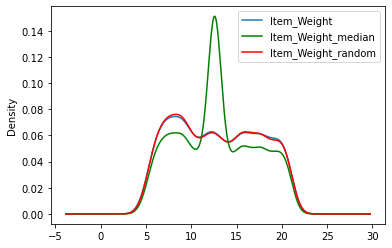

In [21]:
fig = plt.figure()
df1['Item_Weight'].plot(kind = 'kde')
df1.Item_Weight_median.plot(kind = 'kde',color = 'green')
df1.Item_Weight_random.plot(kind = 'kde',color = 'red')
plt.legend()

* Here we use random samples to fill the missing values as it does not change the distribution of the variale.

In [22]:
df1['Item_Weight'] = df1['Item_Weight_random']

df1.drop(['Item_Weight_random','Item_Weight_median'],axis = 1,inplace=True)
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

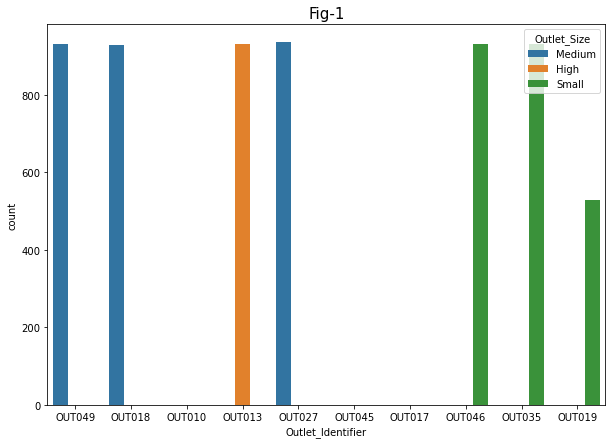

In [23]:
# Outlet_Identifier vs Outlet_Size
plt.figure(figsize=(10,7))
sns.countplot(x = 'Outlet_Identifier',data = df1,hue = 'Outlet_Size')
plt.title('Fig-1',size = 15)
plt.show()

* Summary of Fig-1
  
  Here we can see that Outlet_Identifier **OUT010, OUT017, OUT045** had no Outlet_Size

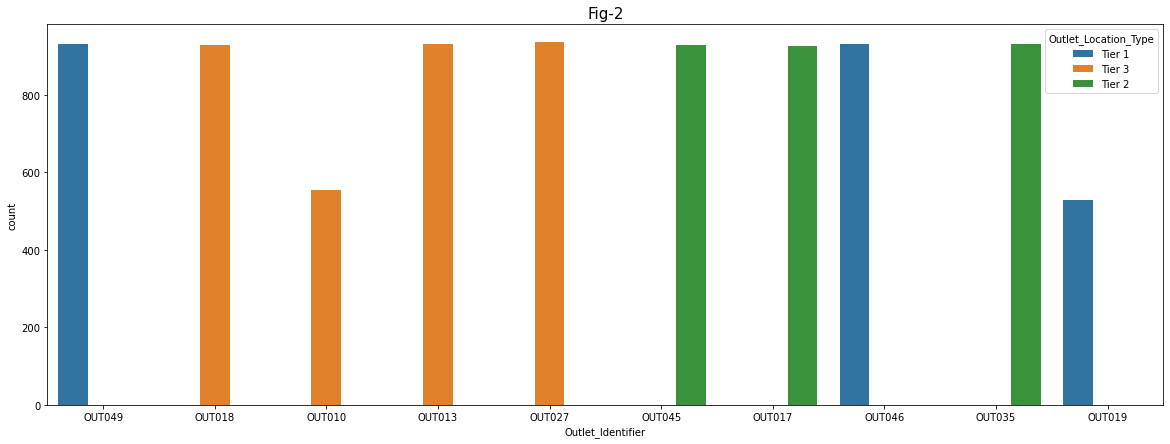

In [24]:
# Outlet_Identifier VS Outlet_Location_Type
plt.figure(figsize=(20,7))
sns.countplot(x = 'Outlet_Identifier',data = df1,hue = 'Outlet_Location_Type')
plt.title('Fig-2',size = 15)
plt.show()

* Summary of Fig-2
    Here wee can see that 
    
1. OUT010 belongs to Tier 3
2. OUT017, OUT045 belongs to Tier 2

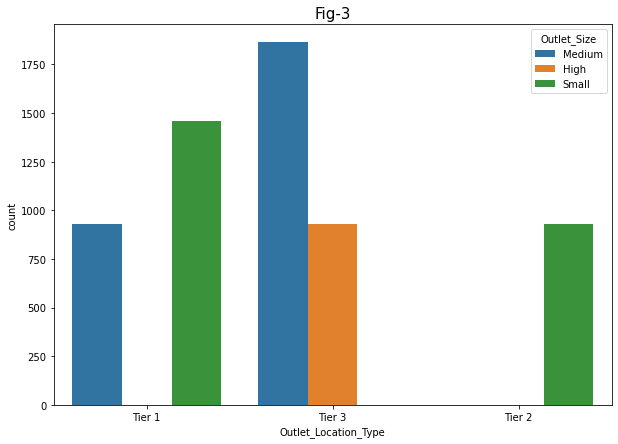

In [25]:
# Outlet_Location_Type Vs Outlet_Size
plt.figure(figsize=(10,7))
sns.countplot(x = 'Outlet_Location_Type',data = df1,hue = 'Outlet_Size')
plt.title('Fig-3',size = 15)
plt.show()

* Summary of Fig-3


From this figure we can say 
1. Tier-2 has Outlet_Size Small

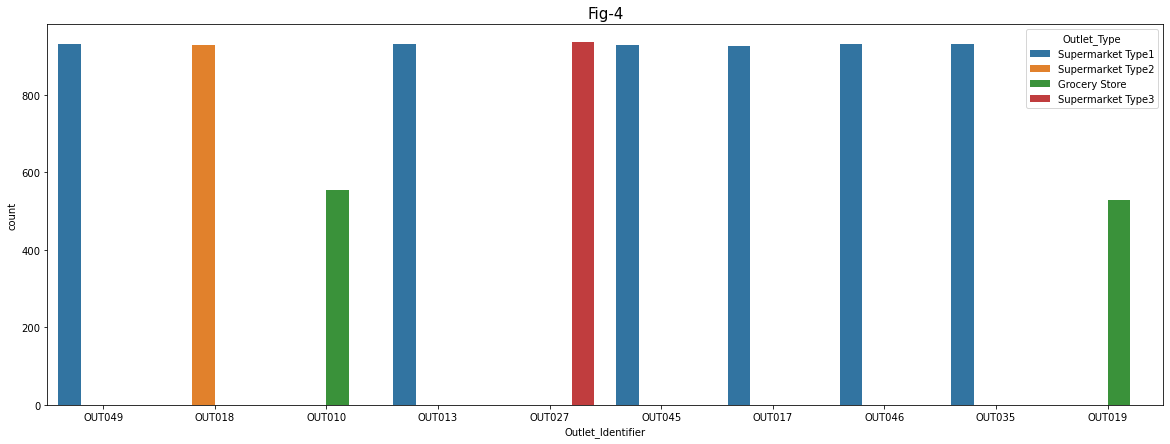

In [26]:
# Outlet_Identifier Vs Outlet_Type
plt.figure(figsize=(20,7))
sns.countplot(x = 'Outlet_Identifier',data = df1,hue = 'Outlet_Type')
plt.title('Fig-4',size = 15)
plt.show()

* Summary of Fig-4

    From this Figure we can say Outlet_Identifier OUT010 is a Grocery Store

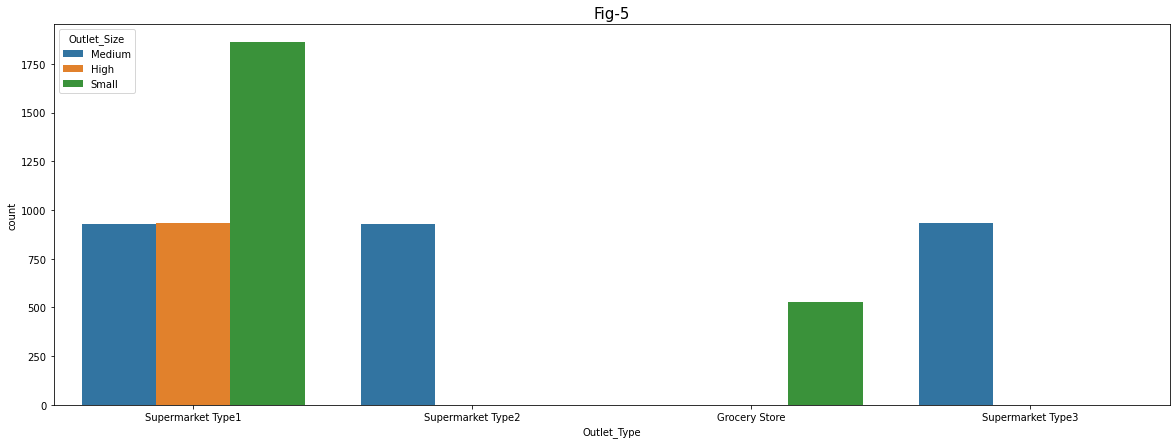

In [27]:
# Outlet_Type Vs Outlet_Size
plt.figure(figsize=(20,7))
sns.countplot(x = 'Outlet_Type',data = df1,hue = 'Outlet_Size')
plt.title('Fig-5',size = 15)
plt.show()

* Summary of Fig-5

    From this we can say Grocery Store are small

In [28]:
# So we can replace the missing values of Outlet_Size with the category small

df1['Outlet_Size'].fillna('Small',inplace=True)

In [29]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 2. Outlier Remover

Item_Visibility has outliers so we remove them

In [30]:
# Calculating IQR, Upper lavel and Lower level of the distributuion of Item Visibility

IQR = df1['Item_Visibility'].quantile(.75) - df1['Item_Visibility'].quantile(.25)
u_lvl = df1['Item_Visibility'].quantile(.75) + 1.5*IQR
l_lvl = df1['Item_Visibility'].quantile(.25) - 1.5*IQR

# removing outliers
df1.loc[df1['Item_Visibility'] > u_lvl, ['Item_Visibility']] = u_lvl

<AxesSubplot:xlabel='Item_Visibility'>

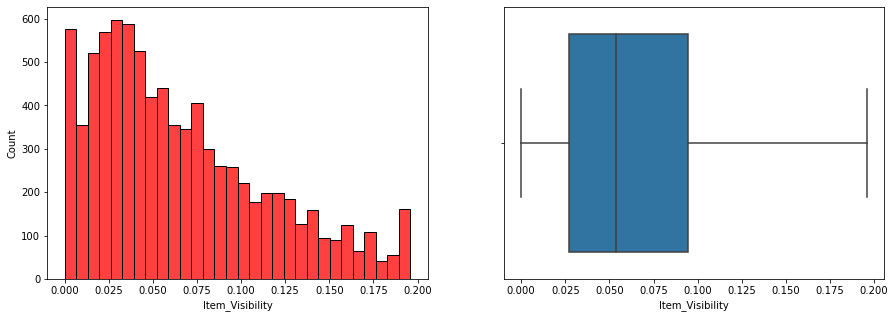

In [31]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
sns.histplot(x='Item_Visibility', data=df1, color='red',ax = ax1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='Item_Visibility', data=df1, ax = ax2)

Now Item_Visibility have a lot of value 0 which make no sence so we can treate them as a missing value 

In [32]:
df1['Item_Visibility'].replace(0,np.nan,inplace=True)
df1.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [33]:
Missing_Value_Imputation_with_Random(df1,'Item_Visibility',df1['Item_Visibility'].quantile(0.5))

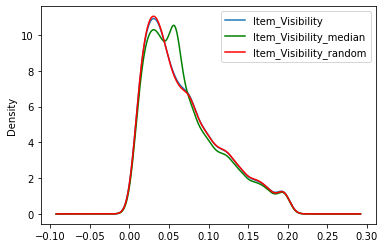

In [34]:
fig = plt.figure()
df1['Item_Visibility'].plot(kind = 'kde')
df1.Item_Visibility_median.plot(kind = 'kde',color = 'green')
df1.Item_Visibility_random.plot(kind = 'kde',color = 'red')
plt.legend()

In [35]:
df1['Item_Visibility'] = df1['Item_Visibility_random']

In [36]:
df1.drop(['Item_Visibility_random','Item_Visibility_median'],axis = 1,inplace=True)

df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:xlabel='Item_Visibility'>

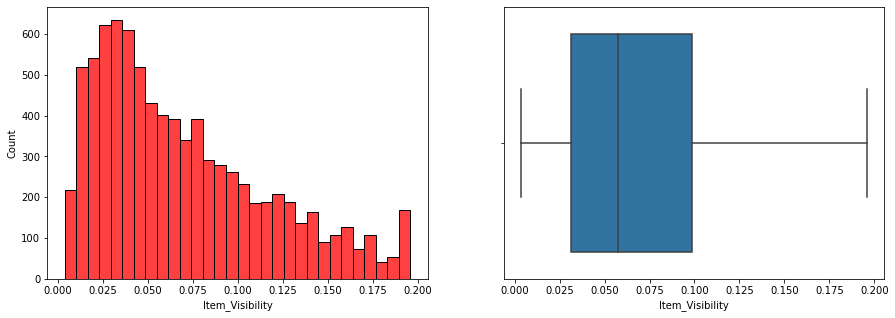

In [37]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
sns.histplot(x='Item_Visibility', data=df1, color='red',ax = ax1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='Item_Visibility', data=df1, ax = ax2)

In [38]:
df2 = df1.copy()

## 3. Transformation of attriutes (Convert them to normal distriution)

Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year

In [39]:
## Checking Gaussian Distribution

import scipy.stats as stats

def QQ_plot(series):
    
    plt.figure(figsize = (15,6))
    
    plt.subplot(121)
    sns.histplot(series, kde = True)
    
    plt.subplot(122)
    stats.probplot(series, plot = plt)
    
    plt.show()

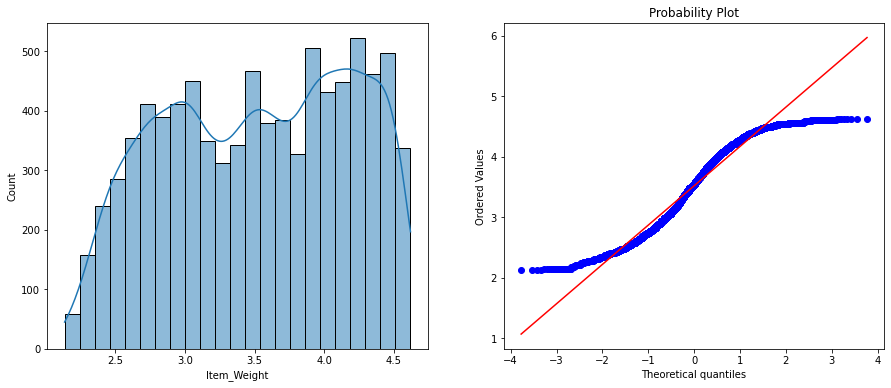

In [40]:
QQ_plot(df2['Item_Weight']**0.5)

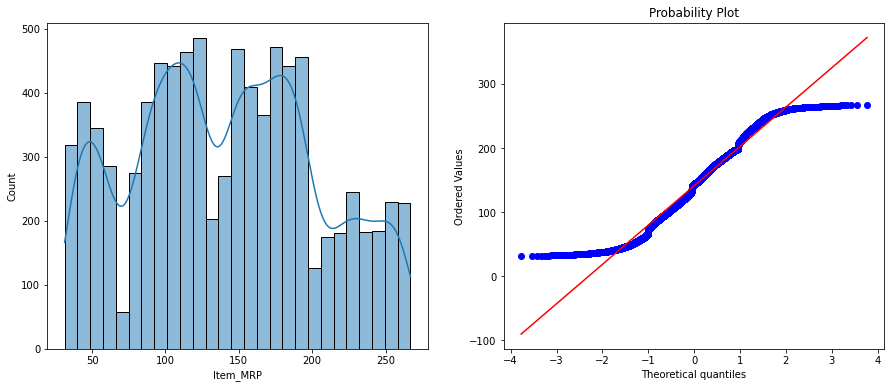

In [41]:
QQ_plot(df2['Item_MRP'])

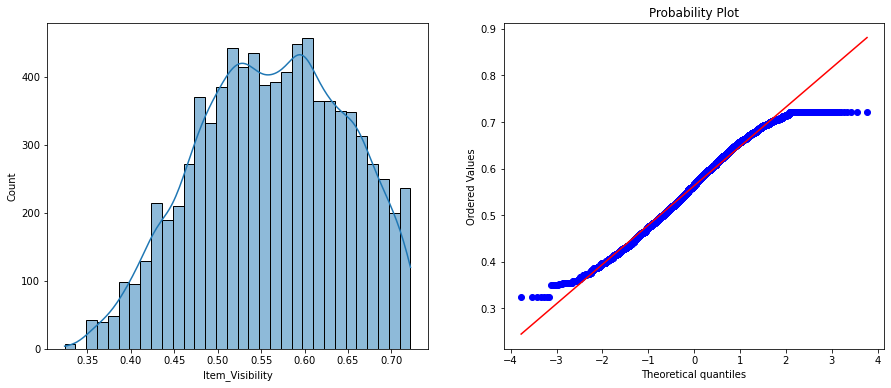

In [42]:
QQ_plot(df2['Item_Visibility']**(1/5))

In [43]:
## Reciprocal Transformation of Item_Visibility

df2['Item_Visibility'] = df2['Item_Visibility']**(1/5)

In [44]:
## Creating a new variale Outlet_Establishment_Age

import datetime
y = datetime.datetime.now()

df2['Outlet_Age'] = df2['Outlet_Establishment_Year'].apply(lambda x: y.year - x)

<AxesSubplot:xlabel='Outlet_Age'>

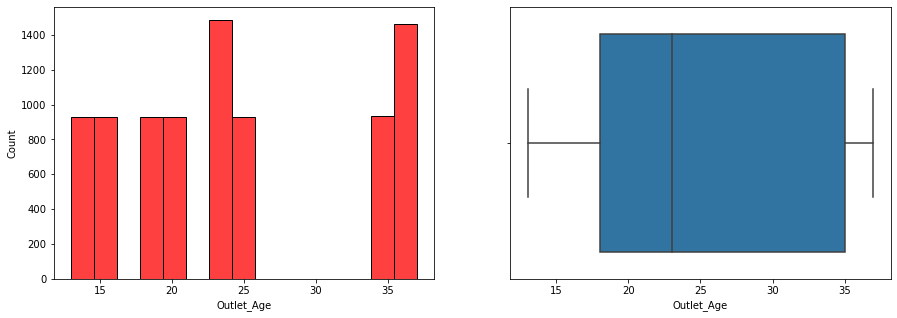

In [45]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
sns.histplot(x='Outlet_Age', data=df2, color='red',ax = ax1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='Outlet_Age', data=df2, ax = ax2)

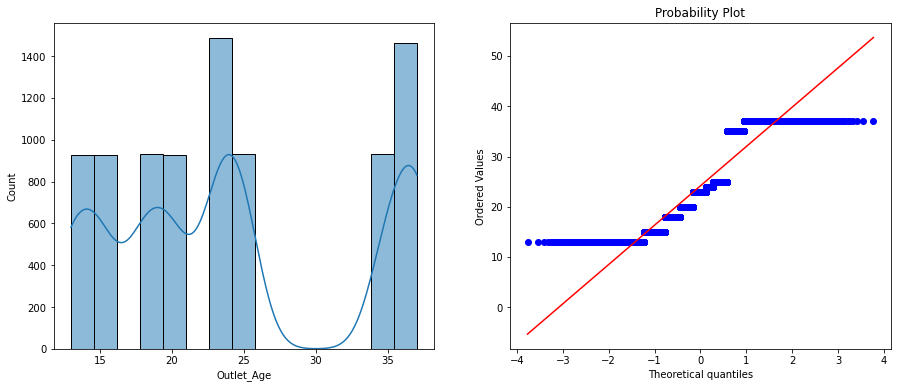

In [46]:
QQ_plot(df2['Outlet_Age'])

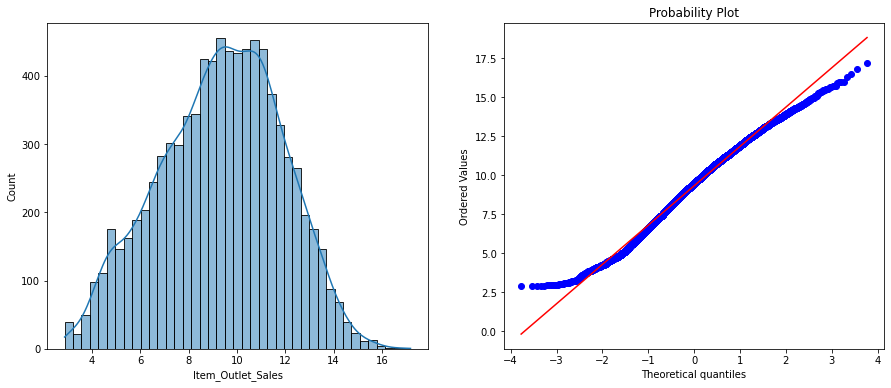

In [47]:
QQ_plot(df2['Item_Outlet_Sales']**0.3)

In [48]:
# Transforming the target column as we know that in linear regression the dependent variable shoud follow Normal Dist.
# Square Root Transformation

df2['Item_Outlet_Sales'] = df2['Item_Outlet_Sales']**0.3

In [49]:
df3 = df2.copy()

## 4. One Hot Encoding

In [50]:
## Find out the frequency of Outlet_Identifier

Outlet_Identifier_map = df3['Outlet_Identifier'].value_counts().to_dict()
Outlet_Identifier_map

{'OUT027': 935,
 'OUT013': 932,
 'OUT049': 930,
 'OUT046': 930,
 'OUT035': 930,
 'OUT045': 929,
 'OUT018': 928,
 'OUT017': 926,
 'OUT010': 555,
 'OUT019': 528}

In [51]:
## Replace the elements of Outlet_Identifier with there frequency

df3['Outlet_Identifier'] = df3['Outlet_Identifier'].map(Outlet_Identifier_map)

In [52]:
# Change the values of Item_Fat_Content

item_fat = df3.Item_Fat_Content.replace('LF', 'Low Fat')
item_fat = item_fat.replace('low fat', 'Low Fat')
item_fat = item_fat.replace('reg', 'Regular')

df3['Item_Fat_Content'] = item_fat

In [53]:
## One Hot Encoding

df3 = pd.get_dummies(data = df3, columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'], drop_first = True)

In [54]:
## Drop Item_Identifier, Outlet_Establishment_Year

df3.drop(columns=['Item_Identifier','Outlet_Establishment_Year'],axis = 1,inplace=True)

df3.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.437603,249.8092,930,11.794838,23,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,5.92,0.453956,48.2692,928,6.223654,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,17.50,0.441423,141.6180,930,9.919649,23,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,19.20,0.492442,182.0950,555,7.234707,24,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,8.93,0.604940,53.8614,932,7.930641,35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


## Checking multicollinearity using VIF

In [55]:
df4 = df3.copy()

In [56]:
## Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df4.drop('Item_Outlet_Sales', axis=1)

vif_data = pd.DataFrame()
vif_data["Features"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Features,VIF
0,Item_Weight,8.778465
1,Item_Visibility,47.736038
2,Item_MRP,6.206976
3,Outlet_Identifier,10292.718277
4,Outlet_Age,557.712617
5,Item_Fat_Content_Regular,1.879397
6,Item_Type_Breads,1.390380
7,Item_Type_Breakfast,1.173392
8,Item_Type_Canned,2.006451
9,Item_Type_Dairy,2.071099


In [57]:
df4.drop(columns=['Outlet_Identifier','Outlet_Age'],axis = 1,inplace = True)

In [58]:
## Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df4.drop('Item_Outlet_Sales', axis=1)

vif_data = pd.DataFrame()
vif_data["Features"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Features,VIF
0,Item_Weight,8.381479
1,Item_Visibility,32.482335
2,Item_MRP,6.075032
3,Item_Fat_Content_Regular,1.871823
4,Item_Type_Breads,1.360625
5,Item_Type_Breakfast,1.165075
6,Item_Type_Canned,1.932993
7,Item_Type_Dairy,2.006959
8,Item_Type_Frozen Foods,2.237036
9,Item_Type_Fruits and Vegetables,2.801243


In [59]:
df4.drop(columns=['Item_Visibility','Outlet_Size_Medium','Outlet_Size_Small'],axis = 1,inplace = True)

In [60]:
## Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df4.drop('Item_Outlet_Sales', axis=1)

vif_data = pd.DataFrame()
vif_data["Features"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Features,VIF
0,Item_Weight,6.993770
1,Item_MRP,5.509041
2,Item_Fat_Content_Regular,1.806669
3,Item_Type_Breads,1.244838
4,Item_Type_Breakfast,1.113725
5,Item_Type_Canned,1.659295
6,Item_Type_Dairy,1.728340
7,Item_Type_Frozen Foods,1.880452
8,Item_Type_Fruits and Vegetables,2.319127
9,Item_Type_Hard Drinks,1.216511


In [61]:
# # Store the Preprocessed data in a .csv format

# df4.to_csv('Data_Set/preprocessed_data_normal.csv', index = False)